# Импорт библиотек

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# параметр для отображения датасета полностью
pd.set_option('display.max_rows', None)

# Предпросмотр данных

Создадим функцию, возвращающую результат запроса из БД

In [29]:
# функция для получения запроса из БД и сохранения результата в pandas dataframe
def get_request(query):
    # подключаемся, отправляем запрос, возвращаем результат, отключаемся
    with sqlite3.connect('frz.db') as db:
        cursor = db.cursor()
        cursor.execute(query)
        results = cursor.fetchall()

    # сохраняем результат в датафрейм
    df = pd.DataFrame(results, columns=[column[0] for column in cursor.description])
    return df

Посмотрим на содержимое таблицы disease_case

In [30]:
query = """
    SELECT
        *
    FROM disease_case
"""

df = get_request(query)

# выведем на просмотр первые 5 строк
df.head(5)

,disease_case_id,diagnosis_code,diagnosis_date,diagnosis_date_unixtime,medical_organization_name,treatment_type,disease_outcome_date,disease_outcome_unixtime,disease_outcome_type,disease_severity,patient_id
0,1,U07.1,08.03.2023,1678208400,"КГБУЗ ""КМДКБ № 1""",Стационарное лечение,13.03.2023,1.678640e+09,Выздоровление,Удовлетворительное,5245185da1f29f81e23558b96eac91dd
1,2,J10.8,02.01.2023,1672592400,"КГБУЗ ""КМКБСМП ИМ. Н.С. КАРПОВИЧА""",Стационарное лечение,03.01.2023,1.672679e+09,Перевод пациента в другую МО,None,968a4449255c7507a2f858d6904afe21
2,3,J18.8,24.08.2023,1692810000,"КГБУЗ ""ШАРЫПОВСКАЯ ГБ""",Стационарное лечение,01.09.2023,1.693501e+09,Отказ пациента от лечения,Средней тяжести,c5fe03ded35879a9180dfc8dd18f5336
3,4,U07.1,03.04.2023,1680454800,"КГБУЗ ""КМКБСМП ИМ. Н.С. КАРПОВИЧА""",Стационарное лечение,07.04.2023,1.680800e+09,Выздоровление,Средней тяжести,33b3263f4b04095e19799c4ea414f8f5
4,5,J18.9,09.08.2023,1691514000,"КГБУЗ ""ТАЙМЫРСКАЯ РБ № 1""",Стационарное лечение,17.08.2023,1.692205e+09,Выздоровление,Удовлетворительное,1ee1ce09b05b5662026e1edc01348242


Посмотрим на содержимое таблицы mkb10

In [31]:
query = """
    SELECT
        *
    FROM mkb10
"""

df = get_request(query)

# выведем на просмотр первые 5 строк
df.head(5)

,code,name
0,B34.2,"Коронавирусная инфекция неуточненная, кроме вы..."
1,J01.9,Острый синусит неуточненный
2,J03.9,Острый тонзиллит неуточненный
3,J05.0,Острый обструктивный ларингит [круп]
4,J06.8,Другие острые инфекции верхних дыхательных пут...


Посмотрим на содержимое таблицы patient

In [32]:
query = """
    SELECT
        *
    FROM patient
"""

df = get_request(query)

# выведем на просмотр первые 5 строк
df.head(5)

,patient_id,age,sex
0,5245185da1f29f81e23558b96eac91dd,0,Мужской
1,968a4449255c7507a2f858d6904afe21,20,Женский
2,c5fe03ded35879a9180dfc8dd18f5336,30,Мужской
3,33b3263f4b04095e19799c4ea414f8f5,19,Женский
4,1ee1ce09b05b5662026e1edc01348242,67,Мужской


# Расчет показателей

1. Структура заболеваемости в разрезе половозрастных групп 

In [33]:
query = """
    SELECT
        CASE
            WHEN age BETWEEN 0 AND 10 THEN '0-10'
            WHEN age BETWEEN 11 AND 20 THEN '11-20'
            WHEN age BETWEEN 21 AND 30 THEN '21-30'
            WHEN age BETWEEN 31 AND 40 THEN '31-40'
            WHEN age BETWEEN 41 AND 50 THEN '41-50'
            WHEN age BETWEEN 51 AND 60 THEN '51-60'
            WHEN age BETWEEN 61 AND 70 THEN '61-70'
            WHEN age BETWEEN 71 AND 80 THEN '71-80'
            WHEN age BETWEEN 81 AND 90 THEN '81-90'
            WHEN age BETWEEN 91 AND 100 THEN '91-100'
        END AS age_group,
        sex,
        COUNT(*) AS cases_count
    FROM patient
    JOIN disease_case ON patient.patient_id = disease_case.patient_id
    GROUP BY age_group, sex;
"""

df = get_request(query)
df

,age_group,sex,cases_count
0,0-10,Женский,1743
1,0-10,Мужской,2076
2,11-20,Женский,1336
3,11-20,Мужской,1432
4,21-30,Женский,1408
5,21-30,Мужской,1083
6,31-40,Женский,2259
7,31-40,Мужской,2145
8,41-50,Женский,2518
9,41-50,Мужской,2205


Визуализация

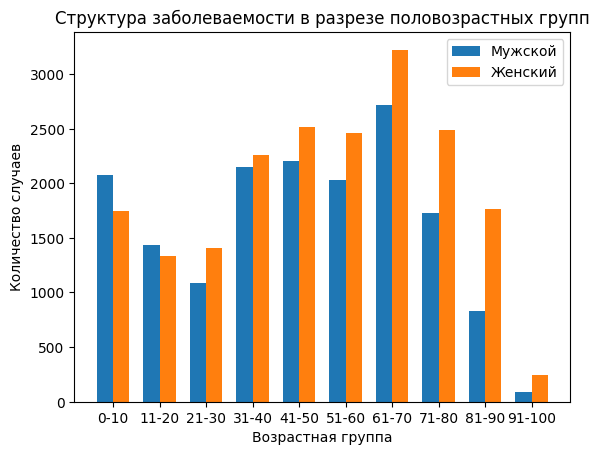

In [34]:
# сгруппируем данные
grouped_data = df.groupby(['age_group', 'sex'])['cases_count'].sum().unstack()

# создадим столбчатую диаграмму
fig, ax = plt.subplots()

# увеличим ширину столбцов
bar_width = 0.35
index = np.arange(len(grouped_data))

# построим столбцы для мужчин
bar1 = ax.bar(index, grouped_data['Мужской'], bar_width, label='Мужской')

# построим столбцы для женщин
bar2 = ax.bar(index + bar_width, grouped_data['Женский'], bar_width, label='Женский')

# добавим информацию о названии, на оси, в легенду
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Количество случаев')
ax.set_title('Структура заболеваемости в разрезе половозрастных групп')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data.index)
ax.legend()

# отобразим диаграмму
plt.show()

2. Динамика половозрастной структуры заболеваемости в разрезе года и месяцев

In [35]:
query = """
    SELECT
        SUBSTR(diagnosis_date, 7, 4) AS year,
        SUBSTR(diagnosis_date, 4, 2) AS month,
        CASE
            WHEN age BETWEEN 0 AND 10 THEN '0-10'
            WHEN age BETWEEN 11 AND 20 THEN '11-20'
            WHEN age BETWEEN 21 AND 30 THEN '21-30'
            WHEN age BETWEEN 31 AND 40 THEN '31-40'
            WHEN age BETWEEN 41 AND 50 THEN '41-50'
            WHEN age BETWEEN 51 AND 60 THEN '51-60'
            WHEN age BETWEEN 61 AND 70 THEN '61-70'
            WHEN age BETWEEN 71 AND 80 THEN '71-80'
            WHEN age BETWEEN 81 AND 90 THEN '81-90'
            WHEN age BETWEEN 91 AND 100 THEN '91-100'
        END AS age_group,
        sex,
        COUNT(*) AS cases_count
    FROM patient
    JOIN disease_case ON patient.patient_id = disease_case.patient_id
    GROUP BY year, month, age_group, sex;
"""

df = get_request(query)

# выведем на просмотр первые 5 строк
df.head(5)

,year,month,age_group,sex,cases_count
0,2023,01,0-10,Женский,289
1,2023,01,0-10,Мужской,369
2,2023,01,11-20,Женский,138
3,2023,01,11-20,Мужской,125
4,2023,01,21-30,Женский,199


Визуализация

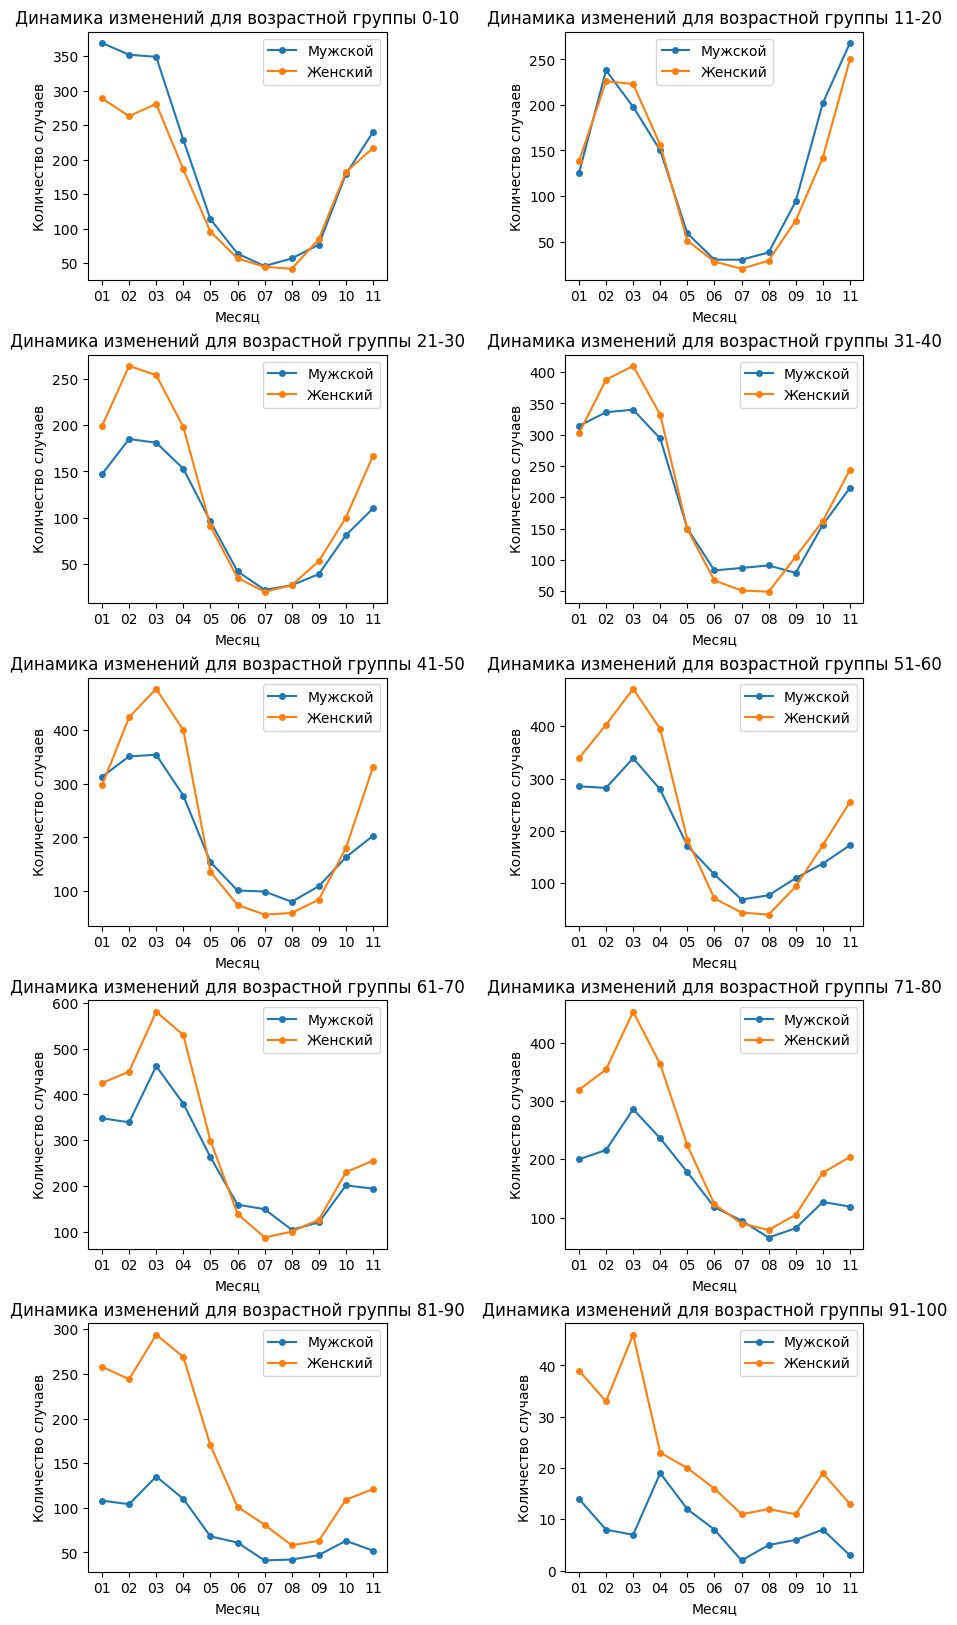

In [36]:
# сгруппируем данные
grouped_df = df.groupby(['month', 'age_group', 'sex'])['cases_count'].sum().reset_index()

# получим уникальные возрастные группы
age_groups = grouped_df['age_group'].unique()

# создадим график с 5 строками и 2 колонками (т.к. всего возрастных 10 групп)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# заполним каждый из графиков
for i, age_group in enumerate(age_groups):
    # фильтруем данные по возрастной группе
    age_group_df = grouped_df[grouped_df['age_group'] == age_group]

    # добавим информацию для мужчин
    male_df = age_group_df[age_group_df['sex'] == 'Мужской']
    axs[i//2, i%2].plot(male_df['month'], male_df['cases_count'], marker='o', markersize=4)

    # добавим информацию о названии, на оси
    axs[i//2, i%2].set_title(f'Динамика изменений для возрастной группы {age_group}')
    axs[i//2, i%2].set_xlabel('Месяц')
    axs[i//2, i%2].set_ylabel('Количество случаев')

    # добавим информацию для женщин
    female_df = age_group_df[age_group_df['sex'] == 'Женский']
    axs[i//2, i%2].plot(female_df['month'], female_df['cases_count'], marker='o', markersize=4)

    # добавим информацию в легенду
    axs[i//2, i%2].legend(labels=['Мужской', 'Женский'])

# увеличим расстояние между графиками
fig.subplots_adjust(wspace=0.6, hspace=0.3)

# отобразим графики
plt.show()

3.  Структура заболеваемости в разрезе диагнозов

In [37]:
query = """
    SELECT
        mkb10.name AS diagnosis_name,
        COUNT(*) AS cases_count
    FROM disease_case
    JOIN mkb10 ON disease_case.diagnosis_code = mkb10.code
    GROUP BY diagnosis_name;
"""

df = get_request(query)
df

,diagnosis_name,cases_count
0,"COVID-19, вирус идентифицирован",21670
1,"COVID-19, вирус не идентифицирован",526
2,Аденовирусная пневмония,1
3,Бактериальная пневмония неуточненная,865
4,Бронхопневмония неуточненная,79
5,Вирусная пневмония неуточненная,116
6,Гипостатическая пневмония неуточненная,19
7,"Грипп с другими проявлениями, вирус не идентиф...",5
8,"Грипп с другими проявлениями, сезонный вирус г...",56
9,"Грипп с другими респираторными проявлениями, с...",244


Визуализация

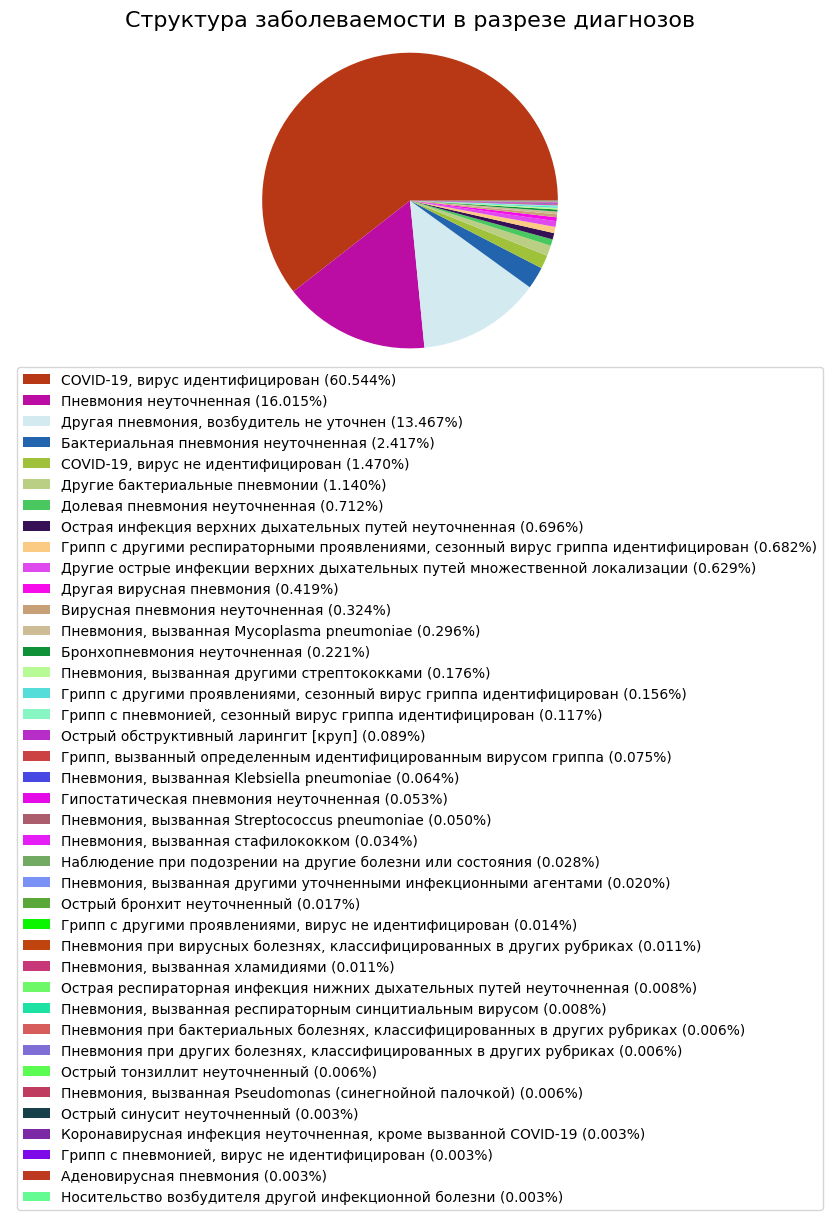

In [38]:
# посчитаем общее количество случаев
total_cases = df['cases_count'].sum()

# посчитаем процентное соотношение и отсортируем по убыванию
percentages = df['cases_count'].apply(lambda x: x/total_cases)
df = df.assign(percentage=percentages).sort_values(by='percentage', ascending=False)
df['diagnosis_name'] = df['diagnosis_name'] + ' (' + df['percentage'].apply(lambda x: '{:.3%}'.format(x)).astype(str) + ')'

# установим seed
np.random.seed(44)

# добавим случайные цвета для каждой группы
colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(len(df))]

# создадим круговую диаграмму
plt.pie(df['cases_count'], colors=colors)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.margins(0)
plt.title('Структура заболеваемости в разрезе диагнозов', fontsize=16, y=0.95)

# добавим легенду
plt.legend(df['diagnosis_name'], loc='lower left', bbox_to_anchor=(0, -2.25))

# отобразим график
plt.gcf().subplots_adjust(left=-0.35)
plt.show()

4. Динамика заболеваемости в разрезе диагноза, года и месяцев

In [39]:
query = """
    SELECT
        SUBSTR(diagnosis_date, 7, 4) AS year,
        SUBSTR(diagnosis_date, 4, 2) AS month,
        mkb10.name AS diagnosis_name,
        COUNT(*) AS cases_count
    FROM disease_case
    JOIN mkb10 ON disease_case.diagnosis_code = mkb10.code
    GROUP BY diagnosis_name, year, month;
"""

df = get_request(query)
# выведем на просмотр первые 5 строк
df.head(5)

,year,month,diagnosis_name,cases_count
0,2023,01,"COVID-19, вирус идентифицирован",2225
1,2023,02,"COVID-19, вирус идентифицирован",3970
2,2023,03,"COVID-19, вирус идентифицирован",4742
3,2023,04,"COVID-19, вирус идентифицирован",3968
4,2023,05,"COVID-19, вирус идентифицирован",1714


В имеющихся данных не у всех диагнозов имеются записи в каждом из месяцев

In [40]:
case = df[df['diagnosis_name'] == 'Острый синусит неуточненный']
case

,year,month,diagnosis_name,cases_count
169,2023,02,Острый синусит неуточненный,1


Добавим значения количества случаев, равные 0 для всех отсутствующих месяцев для каждого диагноза

In [41]:
# сгруппируем данные по диагнозу и месяцу
grouped_df = df.groupby(['month', 'diagnosis_name'])['cases_count'].sum().reset_index()

# создадим новый датасет со всем возможными комбинациями диагнозов и месяцев
months = range(1, 12)
diagnosis_names = grouped_df['diagnosis_name'].unique()
index = pd.MultiIndex.from_product([months, diagnosis_names], names=['month', 'diagnosis_name'])
new_df = pd.DataFrame(index=index).reset_index()
new_df['month'] = new_df['month'].astype(int)
grouped_df['month'] = grouped_df['month'].astype(int)

# объединим датасеты
merged_df = pd.merge(new_df, grouped_df, on=['month', 'diagnosis_name'], how='left')
merged_df['cases_count'] = merged_df['cases_count'].fillna(0)

Визуализация

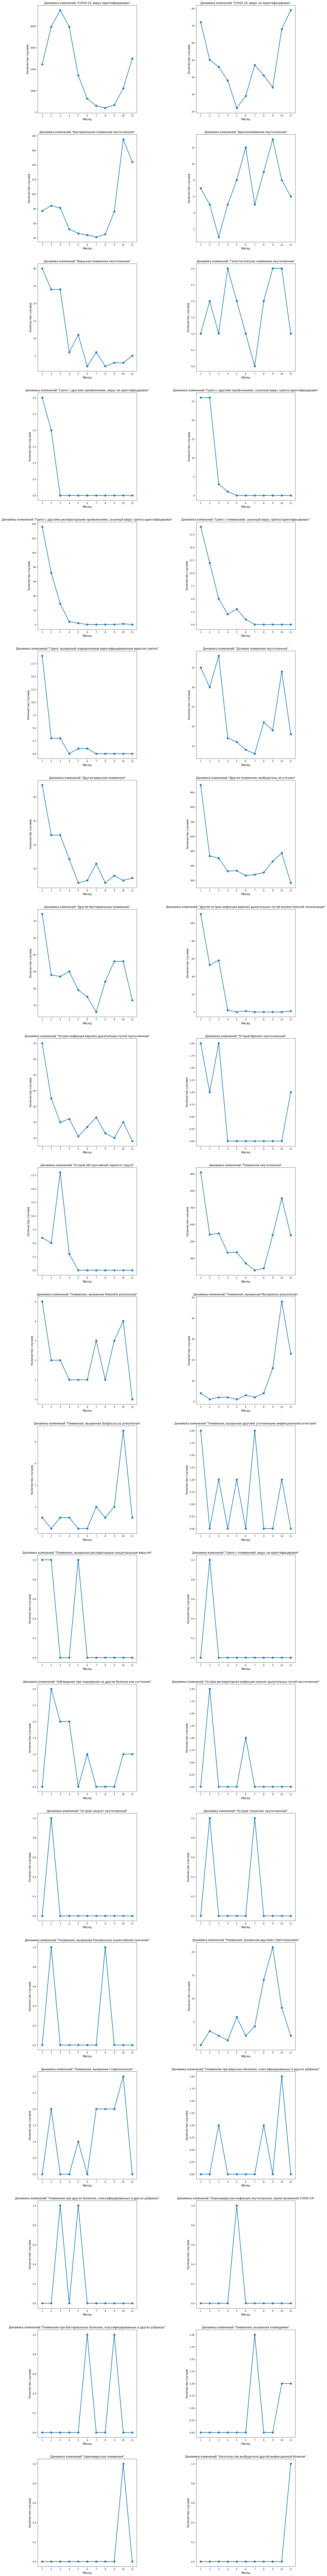

In [42]:
# сгруппируем данные
grouped_df = merged_df.groupby(['diagnosis_name', 'month'])['cases_count'].sum().reset_index()

# создадим график с 20 строками и 2 колонками (т.к. всего 40 уникальных диагнозов)
fig, axs = plt.subplots(nrows=20, ncols=2, figsize=(20, 200))

# заполним каждый из графиков
for i, diagnosis_name in enumerate(diagnosis_names):
    # фильтруем данные по диагнозу
    diagnosis_name_df = grouped_df[grouped_df['diagnosis_name'] == diagnosis_name]

    # добавим информацию для диагноза
    axs[i//2, i%2].plot(diagnosis_name_df['month'], diagnosis_name_df['cases_count'], marker='o', markersize=8, linewidth=2.5)

    # добавим информацию о названии, на оси
    axs[i//2, i%2].set_title(f'Динамика изменений "{diagnosis_name}"')
    axs[i//2, i%2].set_xlabel('Месяц', fontsize=12)
    axs[i//2, i%2].set_ylabel('Количество случаев', fontsize=12)
    axs[i//2, i%2].set_xticks(months)
    axs[i//2, i%2].set_xticklabels([str(month) for month in months])

# увеличим расстояние между графиками
fig.subplots_adjust(wspace=0.6, hspace=0.2)

# отобразим графики
plt.show()

5. Структура заболеваемости в разрезе половозрастных групп отдельно по COVID-19

In [43]:
query = """
    SELECT
        CASE
            WHEN age BETWEEN 0 AND 10 THEN '0-10'
            WHEN age BETWEEN 11 AND 20 THEN '11-20'
            WHEN age BETWEEN 21 AND 30 THEN '21-30'
            WHEN age BETWEEN 31 AND 40 THEN '31-40'
            WHEN age BETWEEN 41 AND 50 THEN '41-50'
            WHEN age BETWEEN 51 AND 60 THEN '51-60'
            WHEN age BETWEEN 61 AND 70 THEN '61-70'
            WHEN age BETWEEN 71 AND 80 THEN '71-80'
            WHEN age BETWEEN 81 AND 90 THEN '81-90'
            WHEN age BETWEEN 91 AND 100 THEN '91-100'
        END AS age_group,
        sex,
        COUNT(*) AS cases_count
    FROM patient
    JOIN disease_case ON patient.patient_id = disease_case.patient_id
    WHERE diagnosis_code IN ('U07.1', 'U07.2')
    GROUP BY age_group, sex;
"""

df = get_request(query)
df

,age_group,sex,cases_count
0,0-10,Женский,671
1,0-10,Мужской,797
2,11-20,Женский,856
3,11-20,Мужской,767
4,21-30,Женский,1165
5,21-30,Мужской,773
6,31-40,Женский,1668
7,31-40,Мужской,1305
8,41-50,Женский,1932
9,41-50,Мужской,1231


Визуализация

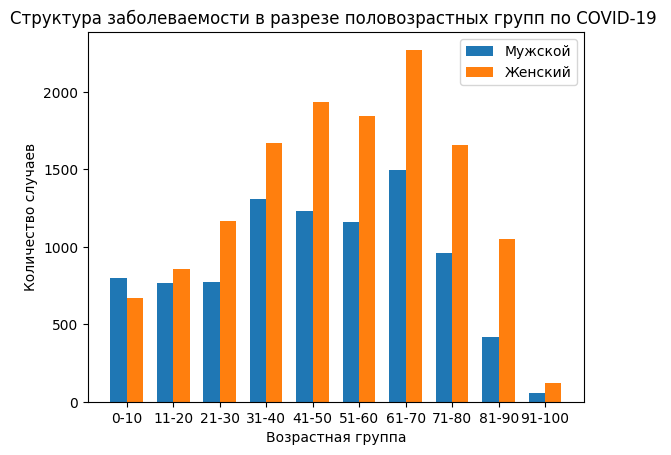

In [44]:
# сгруппируем данные
grouped_data = df.groupby(['age_group', 'sex'])['cases_count'].sum().unstack()

# создадим столбчатую диаграмму
fig, ax = plt.subplots()

# увеличим ширину столбцов
bar_width = 0.35
index = np.arange(len(grouped_data))

# построим столбцы для мужчин
bar1 = ax.bar(index, grouped_data['Мужской'], bar_width, label='Мужской')

# построим столбцы для женщин
bar2 = ax.bar(index + bar_width, grouped_data['Женский'], bar_width, label='Женский')

# добавим информацию о названии, на оси, в легенду
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Количество случаев')
ax.set_title('Структура заболеваемости в разрезе половозрастных групп по COVID-19 ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data.index)
ax.legend()

# отобразим диаграмму
plt.show()

6. Структура  заболеваемости COVID-19 по медицинским организациям 

In [45]:
query = """
    SELECT
        medical_organization_name,
        COUNT(*) AS cases_count
    FROM disease_case
    WHERE diagnosis_code IN ('U07.1', 'U07.2')
    GROUP BY medical_organization_name;
"""

df = get_request(query)

# выведем на просмотр первые 5 строк
df.head(5)

,medical_organization_name,cases_count
0,БОЛЬНИЦА КНЦ СО РАН,169
1,"КГАУЗ ""КМБ № 5""",565
2,"КГБУЗ "" БОГУЧАНСКАЯ РБ""",592
3,"КГБУЗ ""АБАНСКАЯ РБ""",71
4,"КГБУЗ ""АЧИНСКАЯ МРБ""",1268


Визуализация

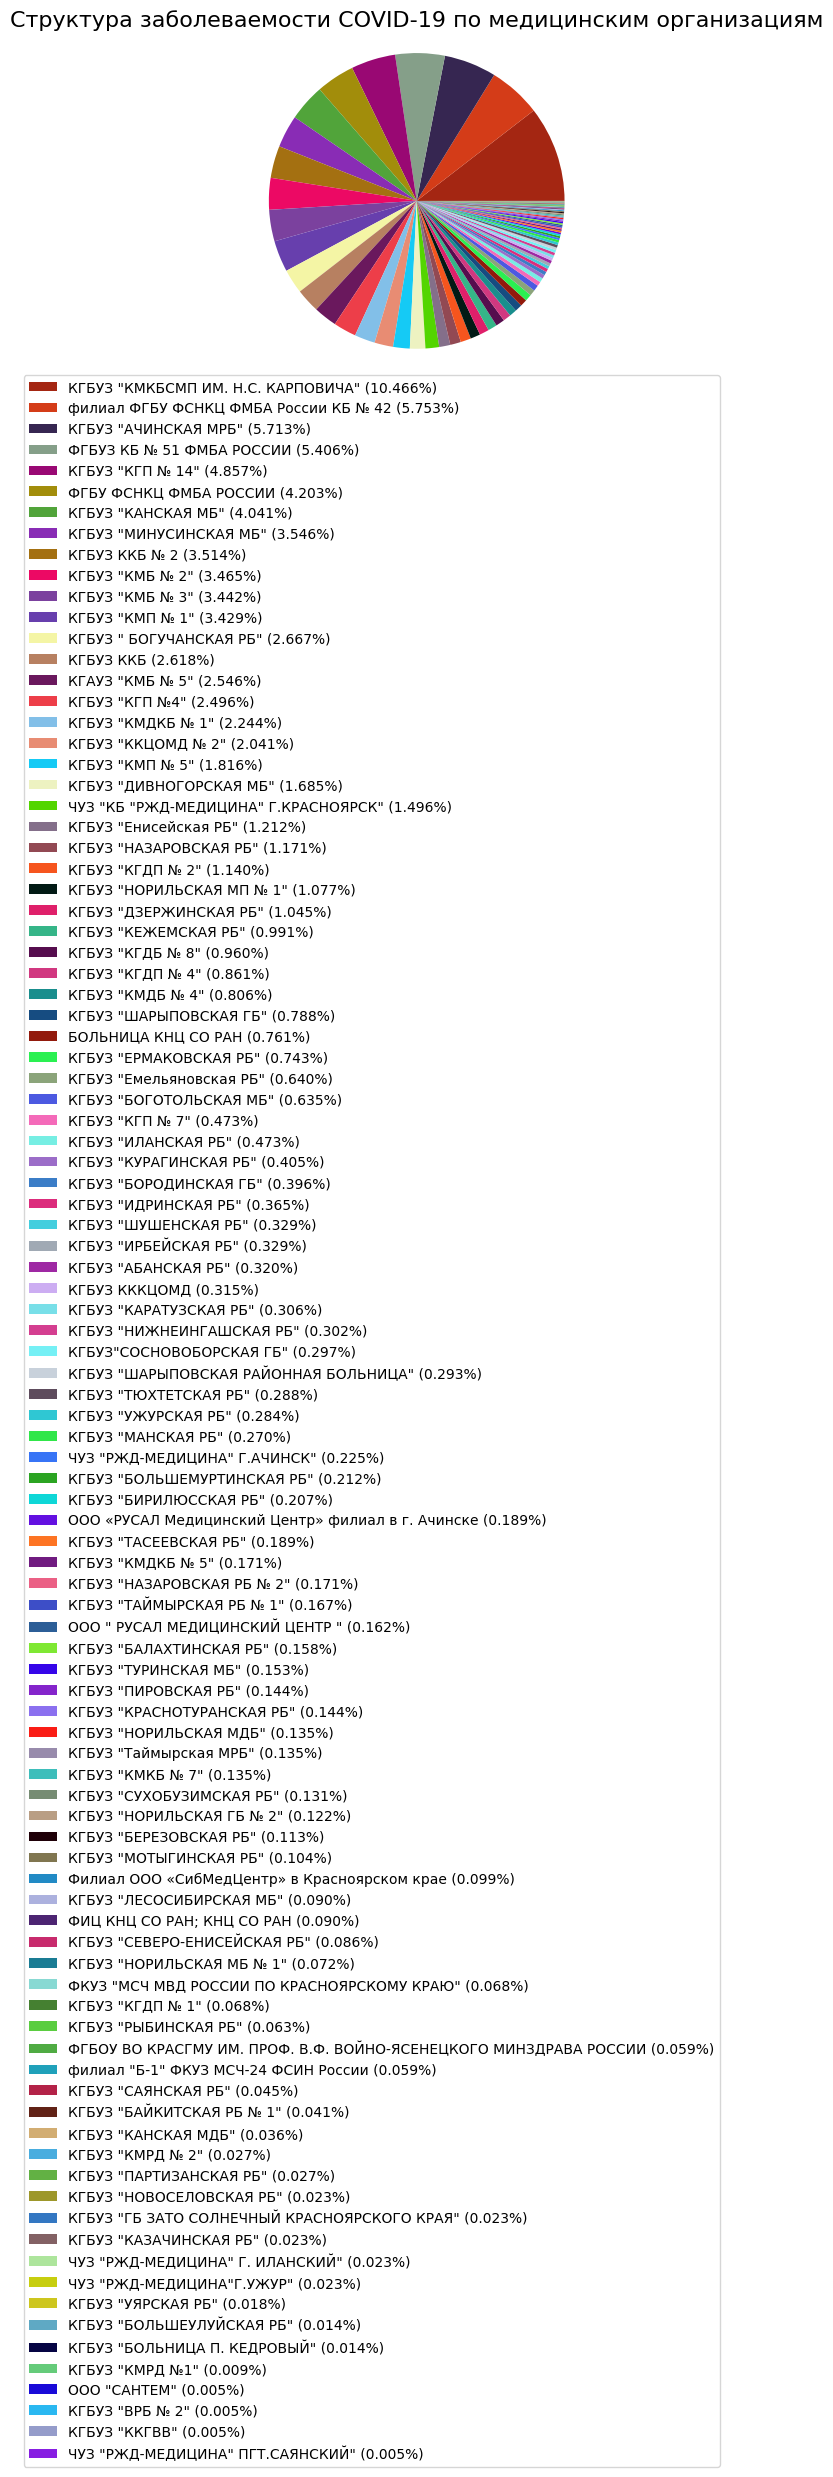

In [46]:
# посчитаем общее количество случаев
total_cases = df['cases_count'].sum()

# посчитаем процентное соотношение и отсортируем по убыванию
percentages = df['cases_count'].apply(lambda x: x/total_cases)
df = df.assign(percentage=percentages).sort_values(by='percentage', ascending=False)
df['medical_organization_name'] = df['medical_organization_name'] + ' (' + df['percentage'].apply(lambda x: '{:.3%}'.format(x)).astype(str) + ')'

# установим seed
np.random.seed(62)

# добавим случайные цвета для каждой группы
colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(len(df))]

# создадим круговую диаграмму
plt.pie(df['cases_count'], colors=colors)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.margins(0)
plt.title('Структура заболеваемости COVID-19 по медицинским организациям', fontsize=16, y=0.95)

# добавим легенду
plt.legend(df['medical_organization_name'], loc='lower left', bbox_to_anchor=(0, -5.65))

# отобразим график
plt.gcf().subplots_adjust(left=-0.35)
plt.show()

7. Структура заболеваемости COVID-19 по типам лечения

In [47]:
query = """
    SELECT
        treatment_type,
        COUNT(*) AS cases_count
    FROM disease_case
    WHERE diagnosis_code IN ('U07.1', 'U07.2')
    GROUP BY treatment_type;
"""

df = get_request(query)
df

,treatment_type,cases_count
0,Амбулаторное лечение,16254
1,Стационарное лечение,5942


Визуализация

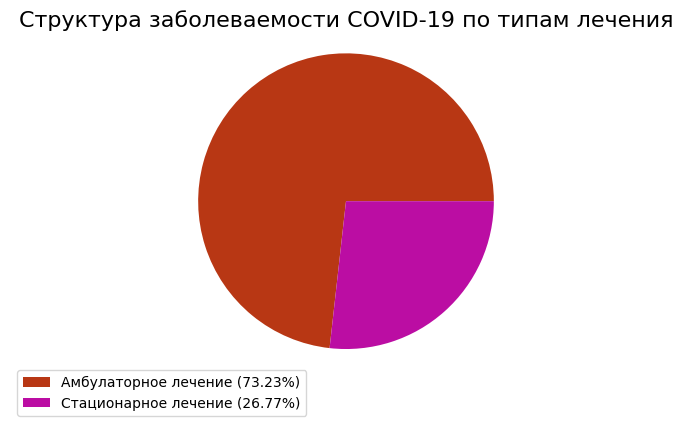

In [48]:
# посчитаем общее количество случаев
total_cases = df['cases_count'].sum()

# посчитаем процентное соотношение и отсортируем по убыванию
percentages = df['cases_count'].apply(lambda x: x/total_cases)
df = df.assign(percentage=percentages).sort_values(by='percentage', ascending=False)
df['treatment_type'] = df['treatment_type'] + ' (' + df['percentage'].apply(lambda x: '{:.2%}'.format(x)).astype(str) + ')'

# установим seed
np.random.seed(44)

# добавим случайные цвета для каждой группы
colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(len(df))]

# создадим круговую диаграмму
plt.pie(df['cases_count'], colors=colors)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.margins(0)
plt.title('Структура заболеваемости COVID-19 по типам лечения', fontsize=16, y=0.95)

# добавим легенду
plt.legend(df['treatment_type'], loc='lower left', bbox_to_anchor=(0, -0.1))

# отобразим график
plt.gcf().subplots_adjust(left=-0.15)
plt.show()

8. Структура заболеваемости COVID-19 по степени тяжести течения

In [49]:
query = """
    SELECT
        disease_severity,
        COUNT(*) AS cases_count
    FROM disease_case
    WHERE diagnosis_code IN ('U07.1', 'U07.2')
    GROUP BY disease_severity;
"""

df = get_request(query)
df

,disease_severity,cases_count
0,None,1081
1,Крайне тяжелое,343
2,Средней тяжести,3600
3,Тяжелое,205
4,Удовлетворительное,16967


Визуализация

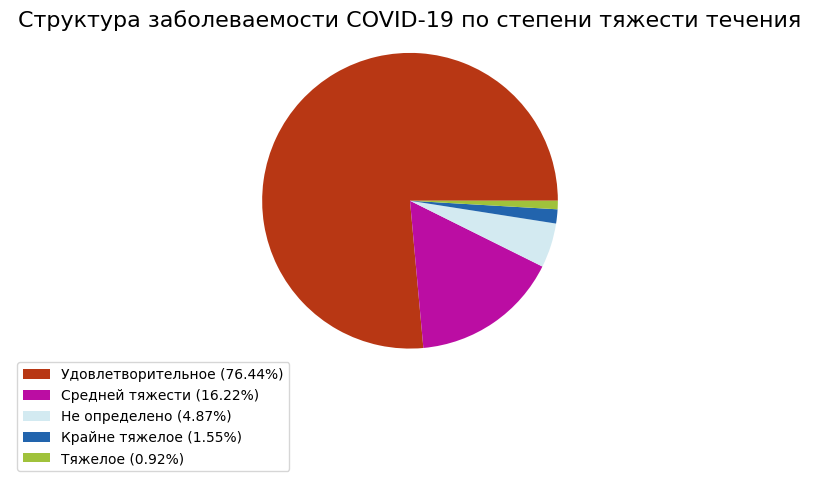

In [50]:
# заполним пропущенные значения
df = df.fillna('Не определено')

# посчитаем общее количество случаев
total_cases = df['cases_count'].sum()

# посчитаем процентное соотношение и отсортируем по убыванию
percentages = df['cases_count'].apply(lambda x: x/total_cases)
df = df.assign(percentage=percentages).sort_values(by='percentage', ascending=False)
df['disease_severity'] = df['disease_severity'] + ' (' + df['percentage'].apply(lambda x: '{:.2%}'.format(x)).astype(str) + ')'

# установим seed
np.random.seed(44)

# добавим случайные цвета для каждой группы
colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(len(df))]

# создадим круговую диаграмму
plt.pie(df['cases_count'], colors=colors)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.margins(0)
plt.title('Структура заболеваемости COVID-19 по степени тяжести течения', fontsize=16, y=0.95)

# добавим легенду
plt.legend(df['disease_severity'], loc='lower left', bbox_to_anchor=(0, -0.25))

# отобразим график
plt.gcf().subplots_adjust(left=-0.35)
plt.show()

9. Структура заболеваемости COVID-19 по типу исхода заболевания

In [51]:
query = """
    SELECT
        disease_outcome_type,
        COUNT(*) AS cases_count
    FROM disease_case
    WHERE diagnosis_code IN ('U07.1', 'U07.2')
    GROUP BY disease_outcome_type;
"""

df = get_request(query)
df

,disease_outcome_type,cases_count
0,None,1203
1,Выздоровление,19539
2,Диагноз не подтвержден,34
3,Отказ пациента от лечения,177
4,Перевод пациента в другую МО,319
5,Перевод пациента на амбулаторное лечение,380
6,Перевод пациента на стационарное лечение,14
7,Смерть,530


Визуализация

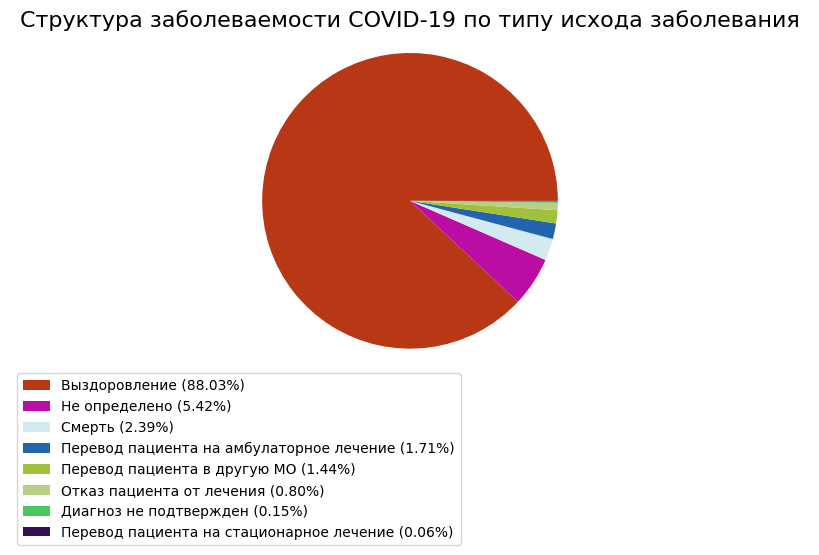

In [52]:
# заполним пропущенные значения
df = df.fillna('Не определено')

# посчитаем общее количество случаев
total_cases = df['cases_count'].sum()

# посчитаем процентное соотношение и отсортируем по убыванию
percentages = df['cases_count'].apply(lambda x: x/total_cases)
df = df.assign(percentage=percentages).sort_values(by='percentage', ascending=False)
df['disease_outcome_type'] = df['disease_outcome_type'] + ' (' + df['percentage'].apply(lambda x: '{:.2%}'.format(x)).astype(str) + ')'

# установим seed
np.random.seed(44)

# добавим случайные цвета для каждой группы
colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(len(df))]

# создадим круговую диаграмму
plt.pie(df['cases_count'], colors=colors)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.margins(0)
plt.title('Структура заболеваемости COVID-19 по типу исхода заболевания', fontsize=16, y=0.95)

# добавим легенду
plt.legend(df['disease_outcome_type'], loc='lower left', bbox_to_anchor=(0, -0.45))

# отобразим график
plt.gcf().subplots_adjust(left=-0.35)
plt.show()

10.  Динамика заболеваемости COVID-19 в разрезе года и месяцев c выделением числа пациентов, находящихся на лечении более 50 дней

In [53]:
query = """
    SELECT
        SUBSTR(diagnosis_date, 7, 4) AS year,
        SUBSTR(diagnosis_date, 4, 2) AS month,
        SUM(CASE
            WHEN julianday(SUBSTR(disease_outcome_date, 7, 4) || '-' || SUBSTR(disease_outcome_date, 4, 2) || '-' || SUBSTR(disease_outcome_date, 1, 2)) -
                 julianday(SUBSTR(diagnosis_date, 7, 4) || '-' || SUBSTR(diagnosis_date, 4, 2) || '-' || SUBSTR(diagnosis_date, 1, 2)) > 50
            THEN 1
            ELSE 0
        END) AS cases_over_50_days
    FROM disease_case
    WHERE diagnosis_code IN ('U07.1', 'U07.2')
    GROUP BY year, month;
"""

df = get_request(query)
df

,year,month,cases_over_50_days
0,2023,01,6
1,2023,02,6
2,2023,03,5
3,2023,04,4
4,2023,05,6
5,2023,06,2
6,2023,07,0
7,2023,08,1
8,2023,09,0
9,2023,10,0


Визуализация

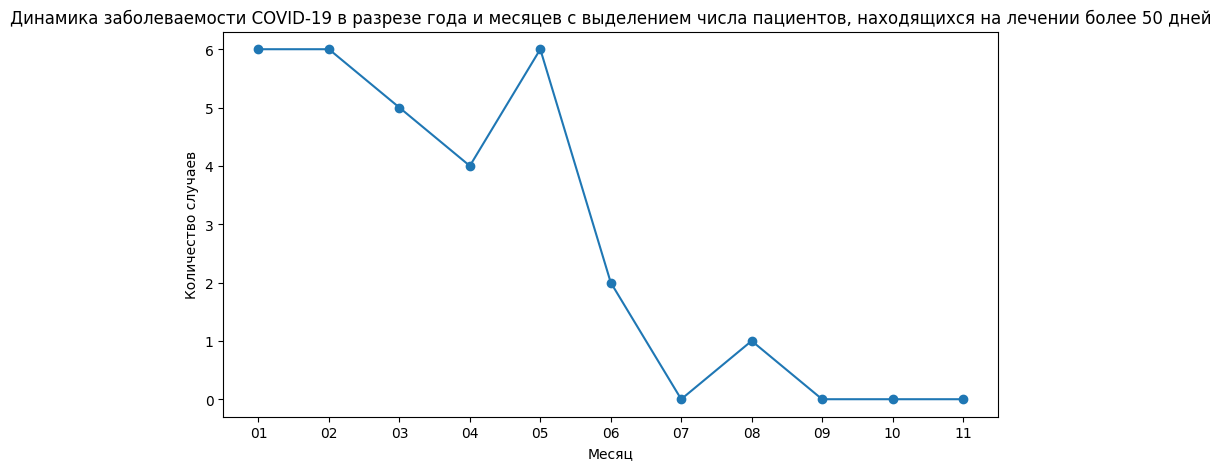

In [54]:
# создадим график
plt.figure(figsize=(10, 5))

# добавим информацию о числе пациентов
plt.plot(df['month'], df['cases_over_50_days'], marker='o')

# добавим информацию о названии, на оси
plt.xlabel('Месяц')
plt.ylabel('Количество случаев')
plt.title('Динамика заболеваемости COVID-19 в разрезе года и месяцев c выделением числа пациентов, находящихся на лечении более 50 дней')
plt.xticks(rotation=0)

# отобразим график
plt.show()